In [1]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df=pd.read_csv('car_price.csv',encoding='ISO-8859-1')

In [3]:
df.shape 

(1000, 16)

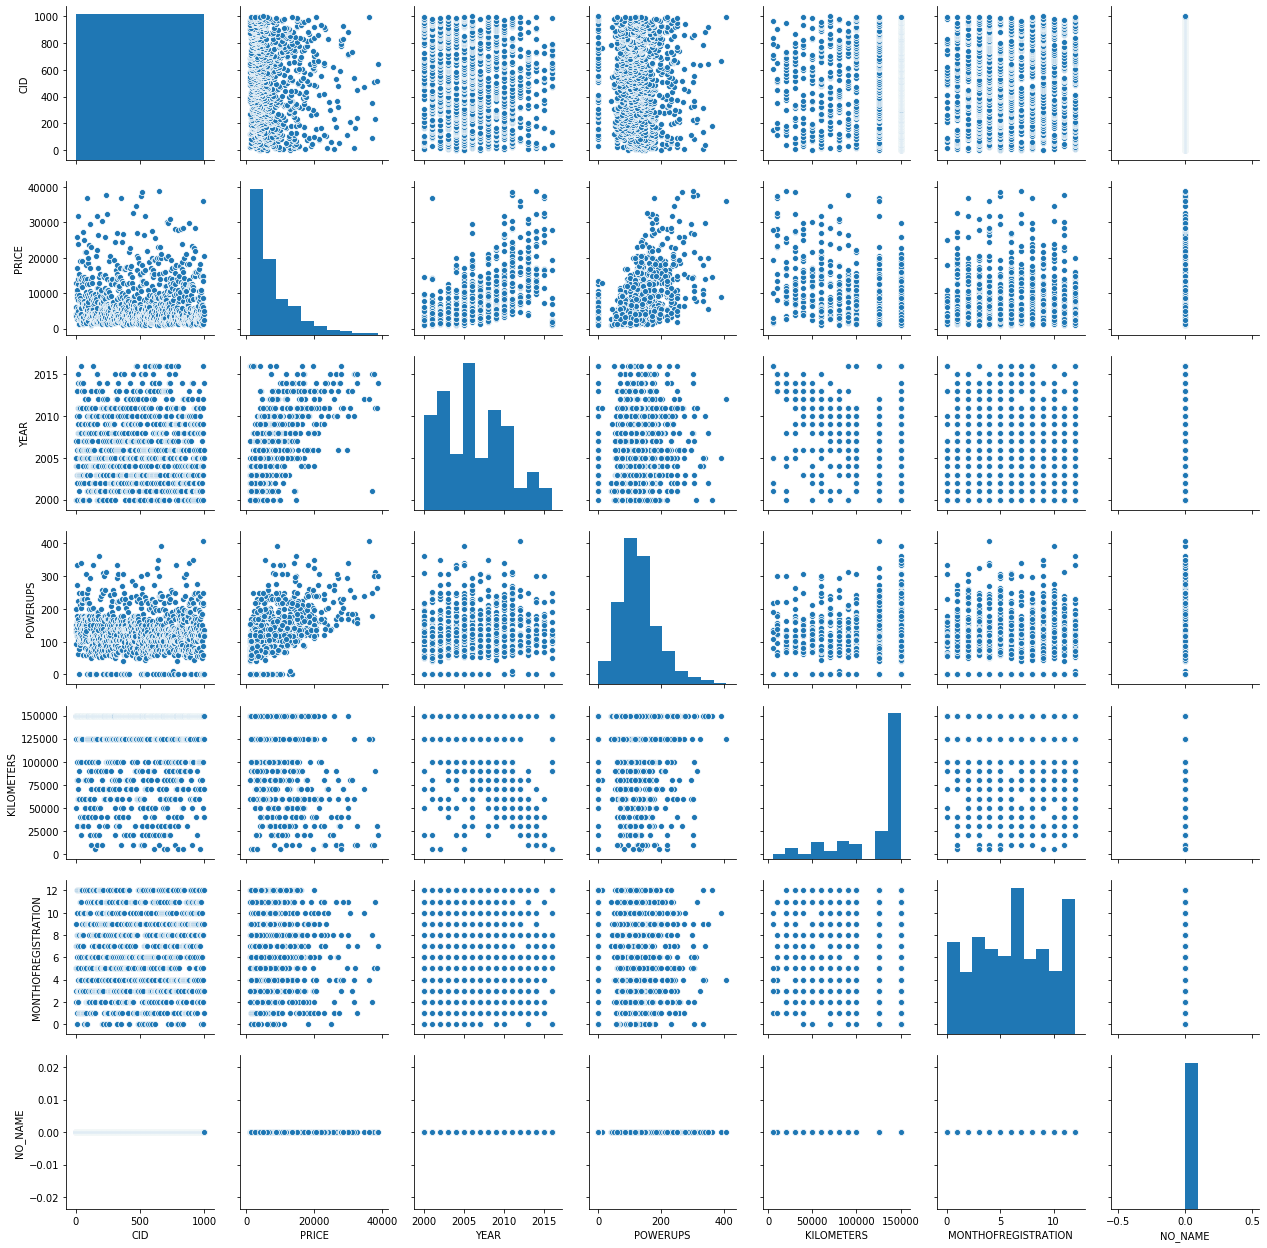

In [4]:
import seaborn as sns 
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(30,5))
plt.style.use()

In [5]:
df.isnull().sum()

CID                      0
DATE_CRAWLED             0
MODEL                    0
SELLER                   0
OFFER_TYPE               0
PRICE                    0
VEHICLE_TYPE            27
YEAR                     0
GEAR_TYPE               23
POWERUPS                 0
KILOMETERS               0
MONTHOFREGISTRATION      0
FUEL                    29
PICS                   119
DATE_CREATED             0
NO_NAME                  0
dtype: int64

In [6]:
df['VEHICLE_TYPE'].fillna(df['VEHICLE_TYPE'].mode()[0],inplace=True)

In [7]:
df['GEAR_TYPE'].fillna(df['GEAR_TYPE'].mode()[0],inplace=True)

In [8]:
df['FUEL'].fillna(df['FUEL'].mode()[0],inplace=True)

In [9]:
df['PICS'].fillna(df['PICS'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

CID                    0
DATE_CRAWLED           0
MODEL                  0
SELLER                 0
OFFER_TYPE             0
PRICE                  0
VEHICLE_TYPE           0
YEAR                   0
GEAR_TYPE              0
POWERUPS               0
KILOMETERS             0
MONTHOFREGISTRATION    0
FUEL                   0
PICS                   0
DATE_CREATED           0
NO_NAME                0
dtype: int64

In [11]:
df.corr(method='pearson')

,CID,PRICE,YEAR,POWERUPS,KILOMETERS,MONTHOFREGISTRATION,NO_NAME
CID,1.000000,-0.034205,-0.021852,-0.026854,0.008138,0.022834,NaN
PRICE,-0.034205,1.000000,0.602503,0.532905,-0.455523,-0.005433,NaN
YEAR,-0.021852,0.602503,1.000000,0.082908,-0.548648,-0.017267,NaN
POWERUPS,-0.026854,0.532905,0.082908,1.000000,0.092769,0.005435,NaN
KILOMETERS,0.008138,-0.455523,-0.548648,0.092769,1.000000,-0.005107,NaN
MONTHOFREGISTRATION,0.022834,-0.005433,-0.017267,0.005435,-0.005107,1.000000,NaN
NO_NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['VEHICLE_TYPE'].value_counts()

limousine    296
Combi        229
Small Car    193
bus           97
cabrio        68
suv           59
coupe         52
Other          6
Name: VEHICLE_TYPE, dtype: int64

In [13]:
df['GEAR_TYPE'].value_counts()

manual       750
automatic    250
Name: GEAR_TYPE, dtype: int64

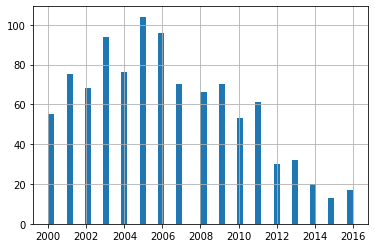

In [14]:
df['YEAR'].hist(bins=50)

In [15]:
df.drop('DATE_CRAWLED',axis=1,inplace=True)

In [16]:
df.drop('DATE_CREATED',axis=1,inplace=True)

In [17]:
df[df.duplicated()]

,CID,MODEL,SELLER,OFFER_TYPE,PRICE,VEHICLE_TYPE,YEAR,GEAR_TYPE,POWERUPS,KILOMETERS,MONTHOFREGISTRATION,FUEL,PICS,NO_NAME


In [20]:
x = df.drop(['NO_NAME','PICS','CID','PRICE'],axis=1)
y = df['PRICE']

In [22]:
X_ = pd.get_dummies(x)

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size=0.33,random_state=5)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(670, 990)
(670,)
(330, 990)
(330,)


In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.35516881376727816

In [29]:
from sklearn.tree import DecisionTreeRegressor

tre = DecisionTreeRegressor()
tre.fit(X_train,y_train)
tre.score(X_test,y_test)

0.6836662826095463

In [31]:
from sklearn.ensemble import RandomForestRegressor

j = RandomForestRegressor()
j.fit(X_train,y_train)
j.score(X_test,y_test)

O:\PB\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7930045833348496

In [33]:
from sklearn.neighbors import KNeighborsRegressor

k = KNeighborsRegressor()
k.fit(X_train,y_train)
k.score(X_test,y_test)

0.5768647747063681

In [42]:
from sklearn.linear_model import SGDRegressor

se = SGDRegressor()
se.fit(X_train,y_train)
se.score(X_test,y_test)

-4.2733545979730296e+29

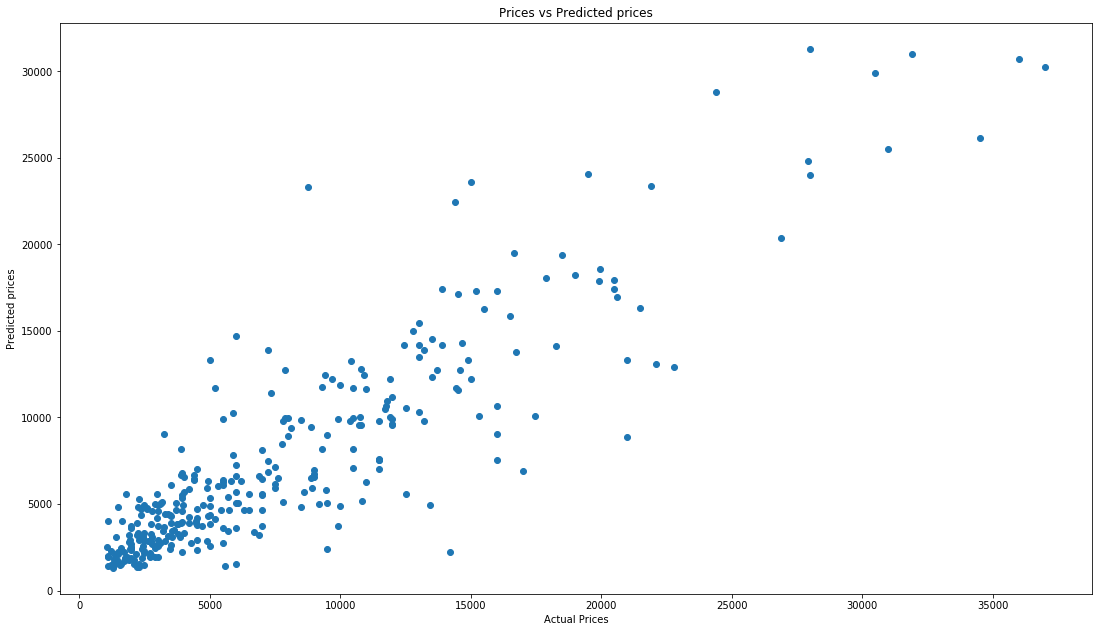

In [40]:
Y_pred = j.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
#plt.figure(figsize=(250,250))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [41]:
from sklearn.metrics import mean_squared_error
# model evaluation for training set
y_train_predict = j.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = j.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))



print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


The model performance for training set
--------------------------------------
RMSE is 1354.0874297650655


The model performance for testing set
--------------------------------------
RMSE is 3029.2218459631854


In [ ]:
pram = {
    
}